### Statistical Learning


Statistical Learning: Large collections of tools that are used to understanding the data.

Two catogories: Supervised learning and Unsupervised learning.

Supervised leaning: Collections of techniques and algorithmns that when given a set of examples inputs and outputs, will associate the inputs with the outputs. Outputs are provided by a supervisor (a human or another algorithmn)

Unsupervised learning: Collections of techniques and algorithmns that when given with inputs only (no outputs). Goal is to learn relationship and structure from such data

Regressions: Problems that have continueous outputs.
Classification: Problems that have categorical outputs. Like 0 or 1, blue or green, etc.

In statistics, variables can be either quantitative or qualitative. Quantitative variables takes numerical values like incomes. Qualitative variables takes values in a given category such as male and females.

Supervised learnings can be classified into two catogories based on the outcomes. If the outcome/output is quantitative, then we're talking about "Regression" problems. If the outcome/output is qualitative, then we're talking about "Classification" problems. 

Y = f(X) predicting the values of Y from the values of X. What the best prediction is depends on the so-called loss function. Loss function: Way of quantifying how far our predictions for Y for a given value of X are from the ture observed values of Y.

Squared error loss function: A loss function in the regression setting. What we should predict is the average of all values of Y that correspond to a given values of X

0-1 loss function: A loss function in the classification setting. The best classification for a given X is obtained by classifying observation of the class with the highest conditional probability given X

### Generating Example Regression Data

Text(0, 0.5, 'y')

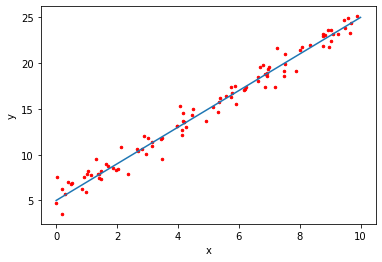

In [2]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

n=100
beta_0=5
beta_1=2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n) #Generating 100 random values for x in range 0 to 1o
#ss.uniform.rvs(size=100) generates 100 values between 0 and 1
#Multiplying with 10 leads the 100 values to be between 0 and 10
y=beta_0 + beta_1 *x + ss.norm.rvs(loc=0,scale=1,size=n)
#loc - mean, scale - standard deviation
plt.figure()
plt.plot(x,y,"r.",ms=5)
xx=np.array([0,10])#xx are range of x values for which I would like to plot my regression function
plt.plot(xx, beta_0 + beta_1 *xx)
plt.xlabel("x")
plt.ylabel("y")

In [3]:
import scipy.stats as ss
import numpy as np
r=10*ss.uniform.rvs(size=10)
print(r)
print(np.mean(r))
m=ss.norm.rvs(loc=0,scale=1,size=10)
print(m)
print(np.mean(m))

[0.15533276 5.93481408 4.33676349 8.07360529 3.15244803 8.92888709
 5.77857215 1.84010202 7.87929234 6.12031177]
5.220012901024736
[-0.11044703 -0.61736206  0.5627611   0.24073709  0.28066508 -0.0731127
  1.16033857  0.36949272  1.90465871  1.1110567 ]
0.4828788165373421


### Comprehensive check

In [4]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale = 1, size = n)
print(round(np.mean(x),2),round(np.mean(y),2))

4.86 14.8


### Simple Linear Regression

Predict the response of Y based on the single predictor X

$Y$ = $\beta_0$ + $\beta_1 X$ + $\epsilon$

$Y$ and $X$ are random variables and $\epsilon$ is error

Whereas for y = $\beta_0$ + $\beta_1$x, y is specific value of $Y$ and x=$X$
Best model parameters $\beta_0$, $\beta_1$ are attained when RSS is minimum

RSS:  81.540007425512


Text(0, 0.5, 'y')

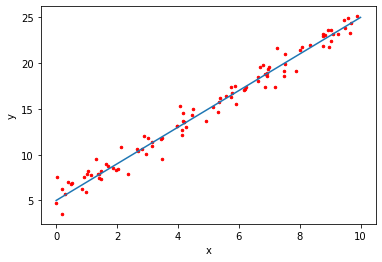

In [5]:
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np

def compute_rss(y_estimate, y):
  return sum(np.power(y-y_estimate, 2))

def estimate_y(x, b_0, b_1):
  return b_0 + b_1 * x

n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale = 1, size = n)

rss = compute_rss(estimate_y(x, beta_0, beta_1), y)
print("RSS: ",rss)
plt.figure()
plt.plot(x,y,"r.",ms=5)
plt.plot(xx, beta_0 + beta_1 *xx)
plt.xlabel("x")
plt.ylabel("y")

### Least Squares Estimation in Code

Let us assumme we know the value of $\beta_0$, and let us find the value of $\beta_1$ (slope of the curve) that gives the minimum RSS

Estimate for the slope:  2.0


Text(0, 0.5, 'RSS')

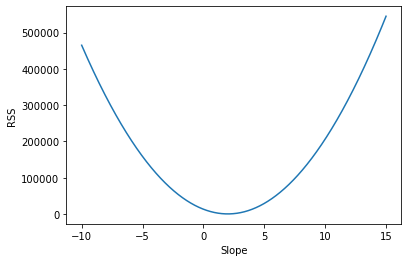

In [6]:
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np

n=100
beta_0=5
beta_1=2

np.random.seed(1)
x=10*ss.uniform.rvs(size=n)
y=beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale = 1, size = n)


rss=[]
slopes=np.arange(-10,15,0.001)
for slope in slopes:
    rss.append(np.sum((y-beta_0-slope*x)**2))
ind_min=np.argmin(rss)
print("Estimate for the slope: ",round(slopes[ind_min],2))

#note that value of beta_1 obtained is similar to what we set above
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("Slope")
plt.ylabel("RSS")

In [10]:
import numpy as np
print(np.arange(-10,15,1)) #generates a array between -10 and 15 (excluding) with a step of 1
a=[1,5,4,99,-1]
print(np.argmin(a))#returns the index of the smallest list element.

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10  11  12  13  14]
4


### Simple Linear Regression in Code

In [55]:
import statsmodels.api as sm
mod = sm.OLS(y,x) #mod is a object. OLS is Ordinary least squares
#x - predictor values
est = mod.fit()
print(est.summary())
#since we've not included intercept int0
#our model, coeff that we have got is little higher ~2.7
X=sm.add_constant(x)
#Capital X, is same as x, but includes one columns of 1s
mod=sm.OLS(y, X)
est=mod.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):                    1.14e-75
Time:                        18:52:26   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Multiple Linear Regression

The goal is to predict a quantitative or scalar valued response Y, on the basis of several predictor variables.
$Y$ = $\beta_0$ + $\beta_1 X_1$ + $\beta_2 X_2$ + ....

### scikit-learn for Linear Regression

1.985371161106092 -1.0116926913711268 5.22497801771553
[5.14894957]
R-square: 0.9773424925041747


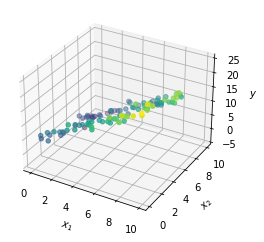

In [9]:
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(1)

n-500
beta_0=5
beta_1=2
beta_2=-1
x_1=10*ss.uniform.rvs(size=n)
x_2=10*ss.uniform.rvs(size=n)
y=beta_0 + beta_1*x_1 + beta_2*x_2 + ss.norm.rvs(loc=0, scale=1, size=n)

X=np.stack([x_1, x_2], axis=1) #x_1 and x_2 are columns of the matrix X
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c=y)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$y$")

from sklearn.linear_model import LinearRegression
lm=LinearRegression(fit_intercept=True)
lm.fit(X, y)
print(lm.coef_[0], lm.coef_[1], lm.intercept_)
X_0=np.array([2, 4]).reshape(1, -1)
print(lm.predict(X_0))
print("R-square:",lm.score(X, y))

### Assessing Model Accuracy

In the regression setting, MSE (Mean Square Error) is the used to assessing the model accuracy.

MSE of training data is called training MSE
MSE of test data is called test MSE

In the classifier setting, Training error rate is used for assessing the model accuracy. It is the proportion of errors that a classifier makes when applied to training data.
Similarly we can define test error rate.

In [60]:
from sklearn.model_selection import train_test_split
#we're spliting the data into training and test data set first
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)
lm=LinearRegression(fit_intercept=True)
#we've created a model object lm. Next we'll fit it.
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

0.9733678561169896